In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

In [3]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['CODE_ROOT'])

In [4]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod
from   findfile      import findfile
from   tmr_kcorr     import tmr_kcorr
from   smith_kcorr   import GAMA_KCorrection

In [5]:
dryrun  = False
version = 'GAMA4'
survey  = 'gama'

##  kE Catalog

In [6]:
fpath   = findfile(ftype='kE', version=version, dryrun=dryrun, survey=survey)
kE = Table.read(fpath)
kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
131329,587724649794240857,180.76711972,-2.12566083,18.65303,0.11777,4,G12_Y5_010_341,6,20.476028,19.212965,18.576176,18.251583,18.058657,0.11777,385.657343775782,37.931008028563134,G12,0,0,-344.7555749720562,-4.616127162040151,-12.797374502680302,344.76514921838094,2.2120877373445627,-13.175221088122482,0.6367893,18.65303,0.6101124839692571,0,4,-0.09045006739797692,-0.06377322946782005,0.1268038529509,0.2040265853723895,0.5595665894779246,2.12,-0.114236906,-0.24967238,-19.290544579835377,-19.15510910293623,-19.40478148600622,37.94357497534319,38.057811881514034,37.80813949844404,-0.09071620896069804,-0.0643606309138205,0.12600866940150307,0.20081465879984278,-19.28974939628598
3896554,588010931368034827,130.03193754,-0.82824616,18.95132,0.13579,4,G09_Y1_AS2_065,6,20.622416,19.486036,18.926216,18.569874,18.402925,0.13579,450.1743757977777,38.26690385529561,G9,0,0,-254.91370920778203,303.4506531763761,-5.729337514181466,252.78516695752936,-305.2207499102411,-6.0063761183002,0.5598202,18.95132,0.5064491195816864,0,3,-0.08899461905273527,-0.0356235634635232,0.11135585088667992,0.1961960662037085,0.47497995985386987,2.12,-0.13171631,-0.2878748,-19.295222747010996,-19.13906426994305,-19.426939057988932,38.246543395204355,38.37825970618229,38.09038491813641,-0.07919339354784961,-0.022129234648248314,0.1375314848143515,0.24304605506541496,-19.321398380938668
196939,587725073915708048,133.21423733,-0.68329043,19.498623,0.10899,4,G09_Y4_219_323,5,21.162916,20.03122,19.425394,19.074348,18.90888,0.10899,354.73324382160934,37.749509451406105,G9,0,0,-219.00882978394768,233.10461211999493,-3.8145796678081343,217.37379215483674,-234.62605984617025,-4.052808689876479,0.6058254,19.498623,0.5931205402613158,0,4,-0.09707034896271187,-0.08436546502969162,0.11797903656030638,0.17739674446079584,0.5464077162938464,2.12,-0.105720304,-0.23105879,-18.26314528972661,-18.13780680239951,-18.368865593679303,37.76176818401372,37.86748848796641,37.63642969668662,-0.09682984184860727,-0.08402015033692997,0.11989503651359384,0.1811551393767333,-18.265061289679895
610431,588848900449632352,180.22008062,0.26112407,19.428183,0.24984,4,G12_Y1_END1_343,5,22.775042,20.73098,19.359447,18.831345,18.568466,0.24984,889.6922259315972,39.746198978750286,G12,0,0,-711.8322408318958,-2.734254646775007,3.2442038776785918,711.8371292546573,-2.229307740557504,2.464081272587672,1.3715324,19.428183,0.931654851225404,0,6,0.0996921043285835,0.5395696932887266,0.3261796292534137,0.9254935062986249,0.7722185631403357,0.8,-0.24234481,-0.199872,-20.401851194516265,-20.44432400406941,-20.64419600607499,39.83003379644498,40.0723786080037,39.872506605998126,-0.019644508133020114,0.2851430098206086,0.197080370229181,0.5503182995342719,-20.272751935492032
544659,588848898854814230,216.23953501,-0.86126824,19.672035,0.26104,4,G15_Y3_047_346,5,25.471466,20.857178,19.552946,19.010834,18.721952,0.26104,935.6161717028779,39.85548859892962,G15,0,0,-598.3461347824131,-438.5

In [7]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = kE[(idx == jj) & (kE['MCOLOR_0P0'].data >= -23.) & (kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.025
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample / dbin, lw=1, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    plt.ylim(0., 10.)
    
    plt.legend(frameon=False)

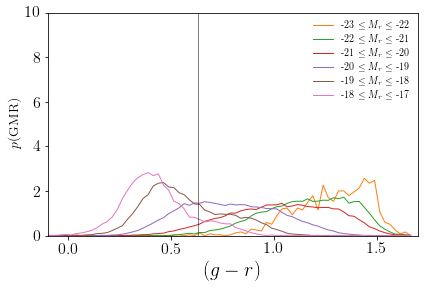

In [8]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

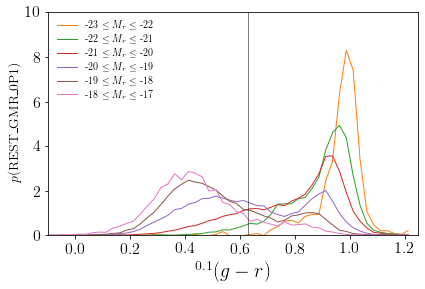

In [9]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

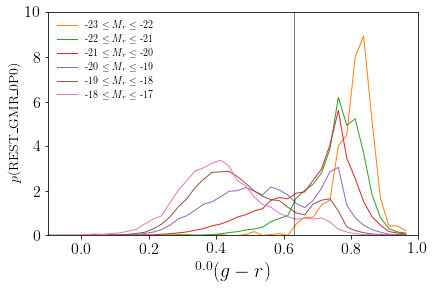

In [10]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

In [11]:
colors    = plt.rcParams['axes.prop_cycle'].by_key()['color']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


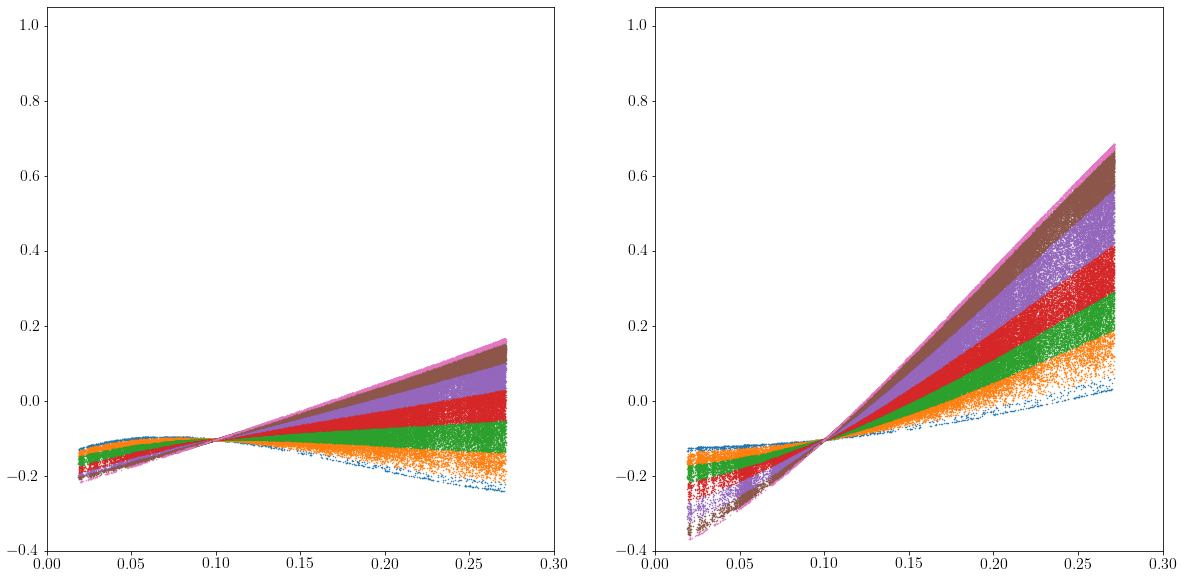

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

# test_plots(axes)

for i, idx in enumerate(np.unique(kE['REST_GMR_0P1_INDEX'])):
    isin = kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P1'][isin], s=0.25, c=colors[i])
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P1'][isin], s=0.25, c=colors[i])
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)

In [15]:
zref      = 0.0

fig, axes = plt.subplots(1, 2, figsize=(20,10))

kcorr_tmr = tmr_kcorr()

kcorr_r   = GAMA_KCorrection(band='R')
kcorr_g   = GAMA_KCorrection(band='G')

z         = np.arange(0.01, 0.601, 0.01)
cols      = [0.130634, 0.298124, 0.443336, 0.603434, 0.784644, 0.933226, 1.06731]

# TMR test                                                                                                                                                                                              
# cols  = [0.158, 0.298, 0.419, 0.553, 0.708, 0.796, 0.960]                                                                                                                                             

colors  = plt.rcParams['axes.prop_cycle'].by_key()['color']

for idx in np.unique(kE['REST_GMR_0P1_INDEX']):
    isin = (kE['REST_GMR_0P1_INDEX'] == idx)

    axes[0].scatter(kE['ZSURV'][isin], kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(kE['ZSURV'][isin], kE['KCORR_G0P0'][isin], s=0.25)

# make r-band k-correction plot                                                                                                                                                                         
for i, c in enumerate(cols):
    col  = np.ones(len(z)) * c
    k    = kcorr_r.k_nonnative_zref(zref, z, col)
    axes[0].plot(z, k, label=r"$^{0.0}(g-r)_\mathrm{med}=%.3f$"%c, c=colors[i], alpha=1.)

    k    = kcorr_tmr.ref_eval(c, z)
    
# make g-band k-correction plot                                                                                                                                                                         
for i, c in enumerate(cols):
    col = np.ones(len(z)) * c
    k = kcorr_g.k_nonnative_zref(zref, z, col)
    axes[1].plot(z, k, label=r"$^{0.0}(g-r)_\mathrm{med}=%.3f$"%c, c=colors[i])

axes[0].set_xlim(0, 0.3)
axes[1].set_xlim(0, 0.3)

axes[0].set_ylim(-0.2, 1.2)
axes[1].set_ylim(-0.2, 1.2)

(-0.2, 1.2)

ValueError: On entry to DHSEQR parameter number 4 had an illegal value

<Figure size 1440x720 with 2 Axes>

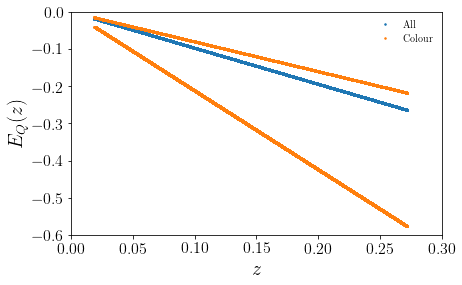

In [32]:
pl.plot(kE['ZSURV'], kE['EQ_ALL_0P0'], marker='.', lw=0.0, label='All', markersize=3)
pl.plot(kE['ZSURV'], kE['EQ_COLOR_0P0'], marker='.', lw=0.0, label='Colour', markersize=3)

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

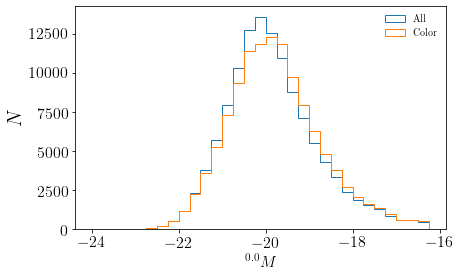

In [16]:
_ = pl.hist(kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


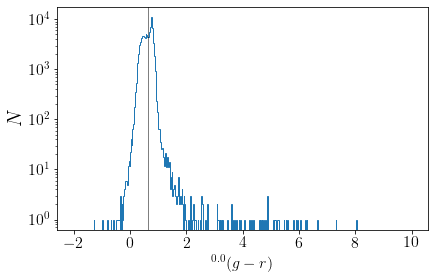

In [34]:
_ = pl.hist(kE['REST_GMR_0P0'], histtype='step', bins=np.arange(-2., 10.0, 0.025))

pl.xlabel(r'$^{0.0}(g-r)$', fontsize=16)
pl.ylabel('$N$')

pl.axvline(0.63, c='k', lw=0.5)

pl.yscale('log')
pl.legend(frameon=False)

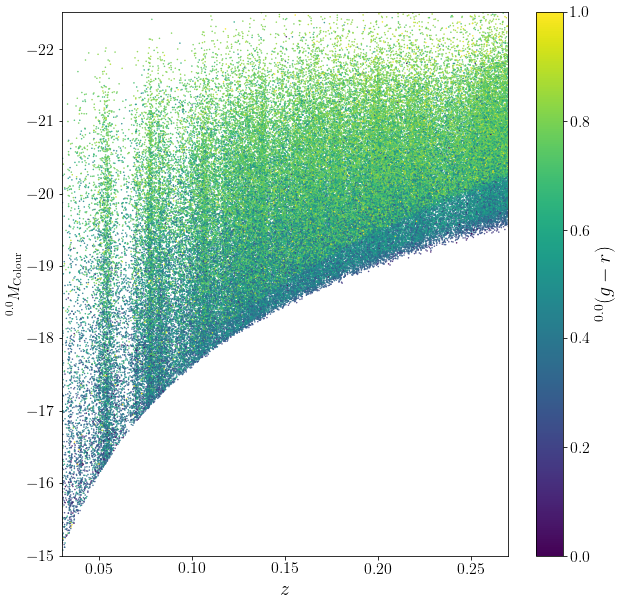

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(kE['ZSURV'], kE['MCOLOR_0P0'], c=kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

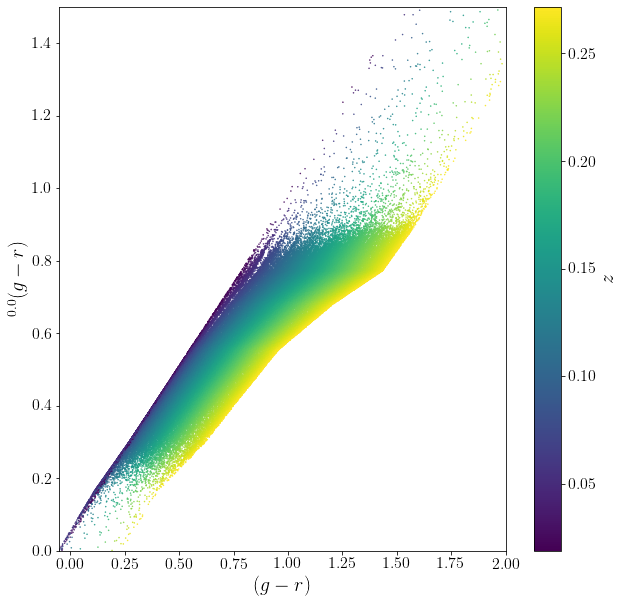

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(kE['GMR'], kE['REST_GMR_0P0'], c=kE['ZSURV'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='$z$')

# Done.